In [117]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x,y = make_classification(n_features=4, n_classes=2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)

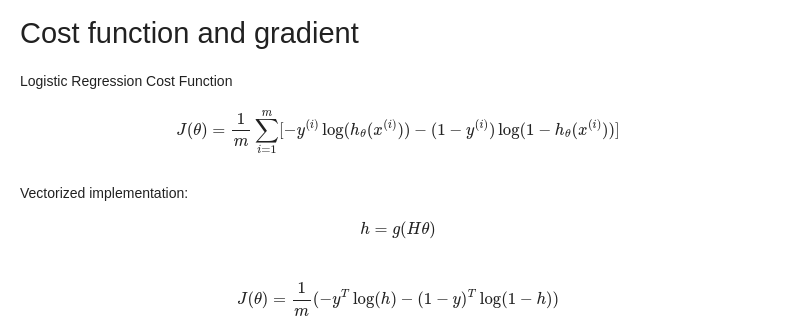

In [119]:
class LogisticRegressionMine:
    def __init__(self) -> None:
        pass

    def fit(self, X, y):
        iterations = 100
        alpha = 0.1
        # append 1's at the back of each instance for bias.
        self.y = y.reshape(-1,1)
        self.X = np.hstack((X, np.ones(X.shape[0]).reshape(-1,1)))
        self.weights = np.zeros((self.X.shape[1],1))
        # front propagation loop
        # dot product
        cost_list = []
        for i in range(iterations):
            cost_list.append(self.cost(self.weights, self.X, self.y))
            self.weights = self.weights -alpha*self.gradient(self.weights, self.X, self.y )
            


    def sigmoid(self, X):
        return 1/(1+np.exp(-X))
    
    def cost(self, theta, X, y):
        m = len(y)
        h = self.sigmoid(X.dot(theta))
        j = -1/m*(y.T.dot(np.log(h))+(1-y.T).dot(np.log(1-h)))
        return j
    
    def gradient(self,theta, X, y):
        m = len(y)
        h = self.sigmoid(X.dot(theta))
        grad = 1/m*X.T.dot(h-y)
        return grad
    
    def predict(self, X):
        X = np.hstack((X, np.ones(X.shape[0]).reshape(-1,1)))
        z = self.sigmoid(np.dot(X,self.weights))
        out = [1 if i>0.5 else 0 for i in z ]
        return out

In [125]:
model = LogisticRegressionMine()
model.fit(x_train, y_train)
out = model.predict(x_test)
print(classification_report(y_test, out))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



In [124]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
out = model.predict(x_test)
print(classification_report(y_test, out))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

